# Data Transformation

**Learning Objective**: Understand how to apply transformations to data such as aggregation, binning, filtering and the creation of new variables.

## Imports

In [1]:
from altair import *

In [2]:
cars = load_dataset('cars')
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970-01-01
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970-01-01
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970-01-01
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970-01-01
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970-01-01


## Aggregation

Aggregation is the process of reducing multiple data values to a single data value by computing some sort of summary statistic (mean, min, max, count, etc). In Altair, aggregations of one variable respect the grouping implied by the visual encodings of the other variables. Here are the supported aggregations in Altair:

<table>
  <thead>
    <tr>
      <th style="text-align: left">Operation</th>
      <th style="text-align: left">Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="text-align: left">count</td>
      <td style="text-align: left">Count the total number of elements in the group. <span class="note-line"><strong>Note:</strong> <em>‘count’</em> operates directly on the input objects and return the same value regardless of the provided field. Similar to SQL’s <code class="highlighter-rouge">count(*)</code>, count can be specified with a <code class="highlighter-rouge">field</code> <code class="highlighter-rouge">"*"</code>.</span></td>
    </tr>
    <tr>
      <td style="text-align: left">valid</td>
      <td style="text-align: left">Count values that are not <code class="highlighter-rouge">null</code>, <code class="highlighter-rouge">undefined</code> or <code class="highlighter-rouge">NaN</code>.</td>
    </tr>
    <tr>
      <td style="text-align: left">missing</td>
      <td style="text-align: left">Count the number of <code class="highlighter-rouge">null</code> or <code class="highlighter-rouge">undefined</code> values.</td>
    </tr>
    <tr>
      <td style="text-align: left">distinct</td>
      <td style="text-align: left">Count the number distinct values.</td>
    </tr>
    <tr>
      <td style="text-align: left">sum</td>
      <td style="text-align: left">Compute the sum of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">mean</td>
      <td style="text-align: left">Compute the mean (average) of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">average</td>
      <td style="text-align: left">Compute the mean (average) of values in a group. Identical to <em>mean</em>.</td>
    </tr>
    <tr>
      <td style="text-align: left">variance</td>
      <td style="text-align: left">Compute the sample variance of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">variancep</td>
      <td style="text-align: left">Compute the population variance of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">stdev</td>
      <td style="text-align: left">Compute the sample standard deviation of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">stdevp</td>
      <td style="text-align: left">Compute the population standard deviation of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">median</td>
      <td style="text-align: left">Compute the median of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">q1</td>
      <td style="text-align: left">Compute the lower quartile boundary of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">q3</td>
      <td style="text-align: left">Compute the upper quartile boundary of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">modeskew</td>
      <td style="text-align: left">Compute the mode skewness of values in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">min</td>
      <td style="text-align: left">Compute the minimum value in a group.</td>
    </tr>
    <tr>
      <td style="text-align: left">max</td>
      <td style="text-align: left">Compute the maximum value in a group.</td>
    </tr>
  </tbody>
</table>

There are two ways to apply a aggregation in Altair:

1. Wrap the column name in an aggregation function: `average(Horsepower)`.
2. Pass the `aggregate` keyword argument to the channel object: `X("Horsepower", aggregate="average")`

Here is an example that computes the average horsepower for each year and origin:

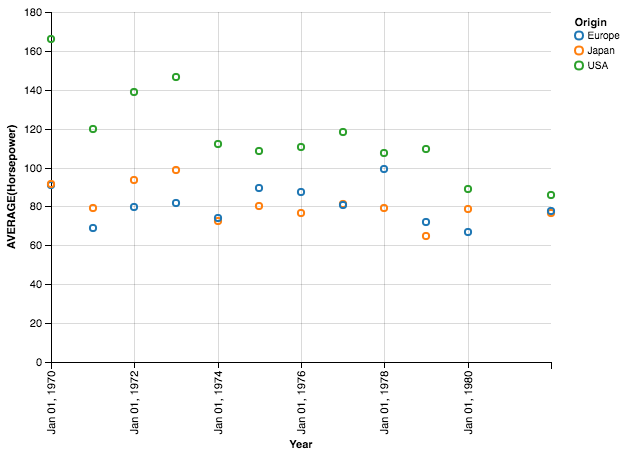

In [18]:
Chart(cars).mark_point().encode(
    x='Year:T',
    y='average(Horsepower):Q',
    color='Origin:N'
)

Here is an example that show how to use `count` to count the number of cars with a given MPG and display the result using bars:

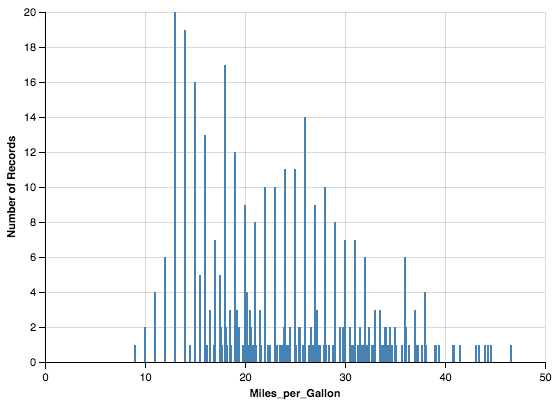

In [20]:
Chart(cars).mark_bar().encode(
    x='Miles_per_Gallon:Q',
    y='count(*):Q'
)

Note here that we get a bar for each unique value of the MPG. This is similar to a histogram, but not quite. In the next section, we will add *binning* to create an actual histogram.

## Binning

When working with quantitative variables, you will often want to reduce their many continuous values to equally-spaced discrete values. Here is the distribution of the actual values of the MPG variable:

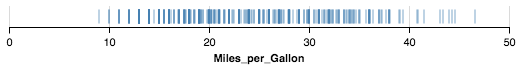

In [13]:
Chart(cars).mark_tick().encode(
    x='Miles_per_Gallon:Q'
)

Binning the data replaces each individual value by the nearest equally spaced discrete values. The idea is to let these discrete values represent groups of samples in the raw data. Here is what the binned MPG variable looks like. In this case, the color of the ticks indicates how many samples went into each binned value:

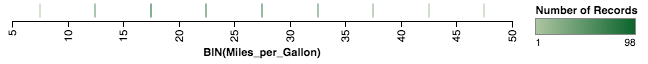

In [16]:
Chart(cars).mark_tick().encode(
    X('Miles_per_Gallon:Q', bin=True),
    Color('count(*):Q')
)

While this visualization allows us to see how binning works, color is not a particularly effective visual encoding of a quantitative variable. A more effective encoding is to use a bar mark. This is known as a *histogram*: binning a quantitative variable and encoding the counts using bars:

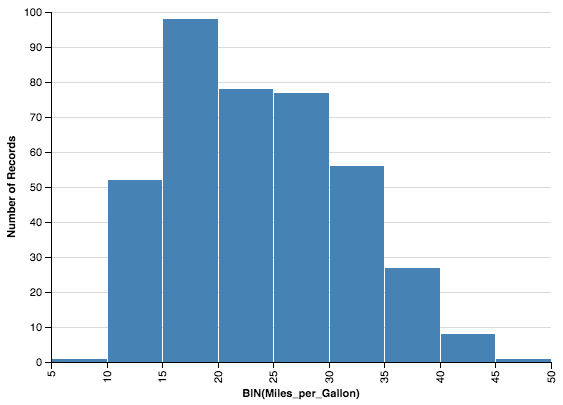

In [23]:
Chart(cars).mark_bar().encode(
    X('Miles_per_Gallon:Q', bin=True),
    y='count(*):Q'
)

The number of bins can be configured by passing a `Bin` object with arguments:

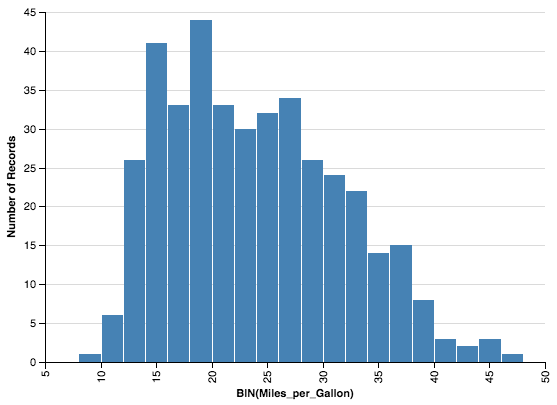

In [24]:
Chart(cars).mark_bar().encode(
    X('Miles_per_Gallon:Q', bin=Bin(maxbins=30)),
    y='count(*):Q'
)

## Filtering

Often times you would like to focus on a subset of your data. This can be accomplished using filtering. Altair offers a subpackage `expr` that provides symbolic manipulation of datasets for these purposes. Begin by passing your actual `DataFrame` to `expr.DataFrame`:

In [4]:
data = expr.DataFrame(cars)

This resulting `data` object is not a real `DataFrame`, but an abstract object you can apply transformations to. These transformation are not applied immediately, but instead done later when the visualization is rendered. Let's do a filter to only include `Acceleration` values greater than 15:

In [5]:
data = data[data.Acceleration > 15]

Once you have performed the transformations, you can simple pass the transformed data to the `Chart` object:

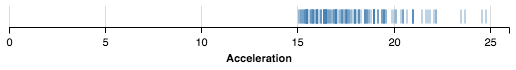

In [6]:
Chart(data).mark_tick().encode(
    x='Acceleration'
)

## New variables

These transformations can also be used to create new columns. Here we add a new `Per_Cylinder` column representing the displacement per cylinder. We expect this to be directly related to the fuel efficiency:

In [7]:
data2 = expr.DataFrame(cars)
data2['Per_Cylinder'] = data2.Displacement//data2.Cylinders

Once we have created the new column, we can use it in a visualization: 

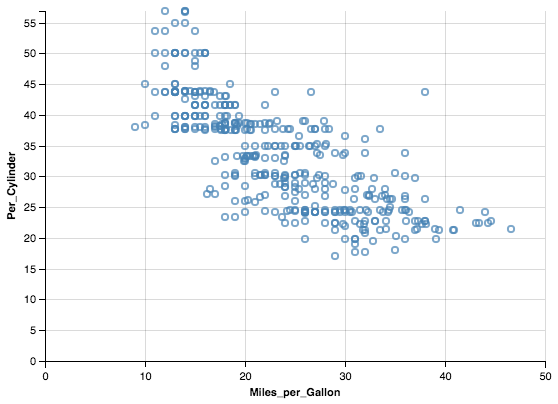

In [8]:
Chart(data2).mark_point().encode(
    x='Miles_per_Gallon',
    y='Per_Cylinder'
)